# <center> Machine Learning </center>
## <center> Lab 1 </center>


# Exercises for Pass (G) #

## Part 1 - Load and pre-process data

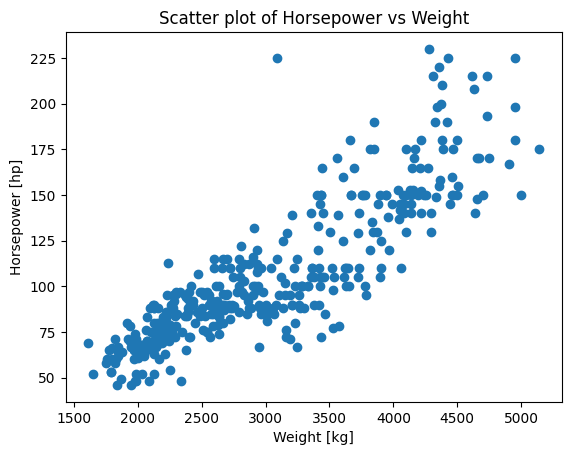

(406,) (406,)


In [102]:
# ====================== YOUR CODE HERE ======================
from sklearn import preprocessing
# ============================================================

import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the .mat file
mat = scipy.io.loadmat(r'./../../datasets/carbig.mat')

# Assuming 'Weight' and 'Horsepower' are keys in the mat dictionary, create a DataFrame
data = pd.DataFrame({
    'Weight': mat['Weight'].ravel(),
    'Horsepower': mat['Horsepower'].ravel()
})
weights,horsepower=data['Weight'], data['Horsepower']
weights,horsepower=np.array(weights),np.array(horsepower)

# Scatter plot
# ====================== YOUR CODE HERE ======================
plt.scatter(weights, horsepower)
# ============================================================

plt.xlabel('Weight [kg]')
plt.ylabel('Horsepower [hp]')
plt.title('Scatter plot of Horsepower vs Weight')
plt.show()

print(weights.shape,horsepower.shape)


In [103]:
def remove_data(X, y):
    # Ensure that X and y have the same number of rows
    assert X.shape[0] == y.shape[0], "Input arrays must have the same number of rows"

    # Create a boolean mask for rows where both X and y are finite
    mask = np.isfinite(y)

    # Use the mask to select only the rows where both X and y are finite
    X_clean = X[mask]
    y_clean = y[mask]
    
    # Replace missing values in X with 0
    X_clean[~np.isfinite(X_clean)]=0

    return np.array(X_clean), np.array(y_clean)

def feature_mean_normalize(X):
    """
    Normalizes the features in X with mean normalization.
    X_norm is the normalized version of X where each column has 0 mean and
    standard deviation 1.
    mu and sigma are vectors of the mean and standard deviation for each
    feature column in X.
    """
    # ====================== YOUR CODE HERE ======================
    # Works for vectors

    #standard_scaler = preprocessing.StandardScaler()
    #X_norm = standard_scaler.fit_transform(np.transpose([X]))
    #mu = np.mean(X_norm)
    #sigma = np.std(X_norm)

    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma

    # ============================================================

    return X_norm, mu, sigma


weights,horsepower=remove_data(weights,horsepower)
print("Shape\n")
print(weights.shape,horsepower.shape)

weights_norm,weights_mean,weights_std=feature_mean_normalize(weights)
print(weights_mean,weights_std)


Shape

(400,) (400,)
2986.565 848.3776551601297


## Part 2 - Linear Regression

In [104]:
def check_gradient(J, theta):
    """
    Function that calculates the numerical gradient for each paramter in theta with the cost function J
    """
    numgrad = np.zeros_like(theta)  # Flatten numgrad
    epsilon = 1e-4

    for i in range(len(numgrad)):  # Iterate through flattened numgrad
        e = np.zeros_like(theta).flatten()  # Flatten e
        e[i] = epsilon
        numgrad[i] = (J(theta + e.reshape(theta.shape)) - J(theta - e.reshape(theta.shape))) / (2 * epsilon)

    return numgrad.flatten()

def cost_linear_regression(theta, X, y):
    m = len(y)
    y = y.reshape(-1, 1)
    # ====================== YOUR CODE HERE ======================
    h = X.dot(theta)
    J = (1.0 / (2.0 * m)) * (np.sum((h - y)**2))
    grad = (1.0 / m) * X.T.dot(h-y)
    # ============================================================

    return J, grad

# Construct data and labels. Pre-process data.
X = weights
y = horsepower
X,y = remove_data(X, y)
X, mu, std = feature_mean_normalize(X)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Concatenating a column of ones to x

# Calculate grad and numgrad and compare
theta = np.zeros((2, 1))  # Initializing theta
J, grad = cost_linear_regression(theta, X, y);
J_func = lambda t: cost_linear_regression(t, X, y)[0]
numgrad = check_gradient(J_func, theta)
diff = np.linalg.norm(numgrad.flatten() - grad.flatten()) / np.linalg.norm(numgrad + grad)
print("Difference (should be less than 1e-10):", diff)



Difference (should be less than 1e-10): 2.792575592311772e-11


## Part 3 - gradient descent

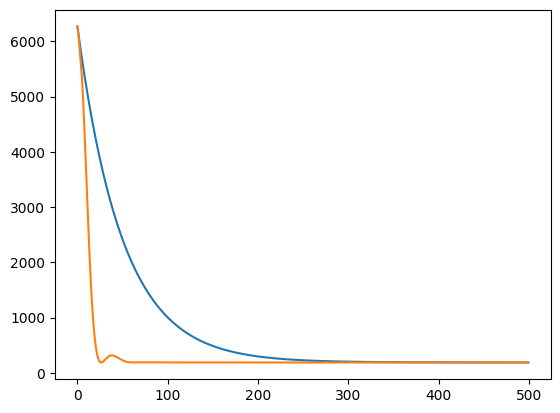

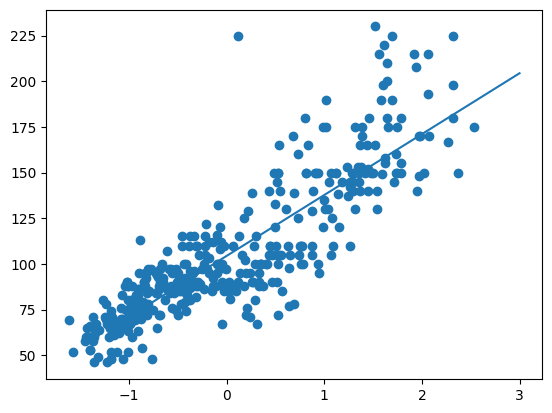

In [105]:
def gradient_descent(theta, X, y, alpha, num_iters, momentum_flag):
    J_history = np.zeros(num_iters)

    if momentum_flag == 1:
        gamma = 0.9
        velocity = 0
        for iter in range(num_iters):
            if iter < 5:
                gamma = 0.5
            else:
                gamma = 0.9
            J, grad = cost_linear_regression(theta, X, y)
            velocity = gamma * velocity + alpha * grad
            J_history[iter] = J
            theta = theta - velocity
    else:
        for iter in range(num_iters):
           # theta=theta.flatten()
            J, grad = cost_linear_regression(theta, X, y)
            J_history[iter] = J

            # ====================== YOUR CODE HERE ======================
            theta = theta - alpha * grad
            # ============================================================
        
    return theta, J_history

# Hyperparameters
momentum_flag = 1
alpha = 0.01
num_iters = 500

# Train!
theta, J_historyMomentum = gradient_descent(theta, X, y, alpha, num_iters, momentum_flag)
momentum_flag = 0
theta = np.zeros((2, 1))  # Initializing theta
theta, J_history = gradient_descent(theta, X, y, alpha, num_iters, momentum_flag)

# Plot the cost history
# ====================== YOUR CODE HERE ======================
plt.plot(J_history)
plt.plot(J_historyMomentum)
# ============================================================

# Plot the data and the linear fit model
# ====================== YOUR CODE HERE ======================

plt.figure()
xPlot = X[:,1]
yPlot = y
plt.scatter(xPlot, yPlot)

x = np.linspace(-1, 3, 200)
k = theta[1]
m = theta[0]
y = k * x + m
plt.plot(x, y)

# ============================================================


## Part 4 - Linear regression for multiple variables

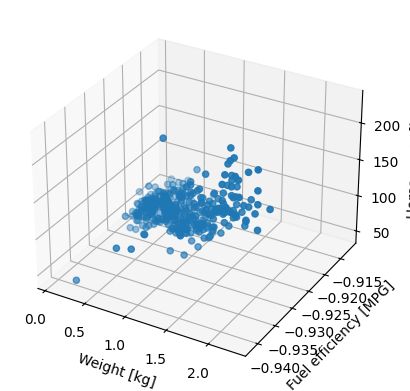

Difference (should be less than 1e-10): 1.465403857633631e-11


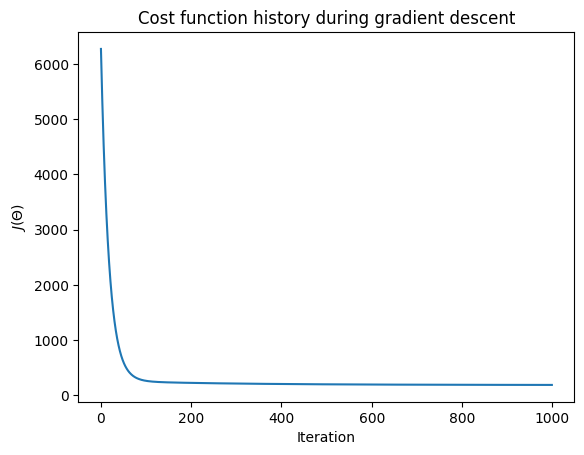

<Figure size 1000x600 with 0 Axes>

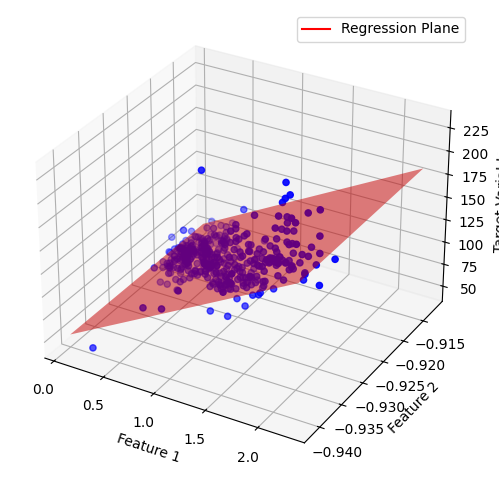

Predicted y for 3000 kg car and 30 mpg: [105.86107854]


In [106]:
# Load the .mat file
mat = scipy.io.loadmat(r'./../../datasets/carbig.mat')

# Converting the loaded .mat file into a Pandas DataFrame
data = pd.DataFrame({
    'Weight': np.array(mat['Weight']).flatten(),
    'MPG': np.array(mat['MPG']).flatten(),
    'Horsepower': np.array(mat['Horsepower']).flatten(),
})

# Accessing the data
weights = data['Weight']
mpg = data['MPG']
horsepower = data['Horsepower']

# Construct data and labels. Pre-process data.
X = np.c_[weights, mpg]
y = horsepower
X,y = remove_data(X, y)
X, mu, std = feature_mean_normalize(X)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Concatenating a column of ones to x

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ====================== YOUR CODE HERE ======================
ax.scatter(X[:,1], X[:,2], y)
# ============================================================
ax.set_xlabel('Weight [kg]')
ax.set_ylabel('Fuel efficiency [MPG]')
ax.set_zlabel('Horsepower [hp]')
plt.show()

# Check the gradients
theta = np.zeros((3, 1))  # Initializing theta
J, grad = cost_linear_regression(theta, X, y);
J_func = lambda t: cost_linear_regression(t, X, y)[0]
numgrad = check_gradient(J_func, theta)
diff = np.linalg.norm(numgrad.flatten() - grad.flatten()) / np.linalg.norm(numgrad + grad)
print("Difference (should be less than 1e-10):", diff)

# Hyperparameters
momentum_flag=0
alpha = 0.01
num_iters = 1000

# Train!
theta, J_history = gradient_descent(theta, X, y, alpha, num_iters, momentum_flag)

# Plot the cost history
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function history during gradient descent')
plt.show()
plt.figure(figsize=(10,6))

# Plot the data and the linear fit
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y, color='b', marker='o', label='Actual data')
# Creating a grid of points
x0_range = np.linspace(np.min(X[:,1]), np.max(X[:,1]), num=10)
x1_range = np.linspace(np.min(X[:,2]), np.max(X[:,2]), num=10)
x0, x1 = np.meshgrid(x0_range, x1_range)
z = theta[0] + theta[1] * x0 + theta[2] * x1 # Computing the predicted values
ax.plot_surface(x0, x1, z, alpha=0.5, rstride=100, cstride=100, color='r') # Plotting the regression plane
# Creating a proxy artist for the legend
import matplotlib.lines as mlines
red_patch = mlines.Line2D([], [], color='red', label='Regression Plane')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Variable')
# Adding the legend with the proxy artist
ax.legend(handles=[red_patch])
plt.show()


# Predict the horsepower for a car with weight 3000 kg and 30 MPG.
# ====================== YOUR CODE HERE ======================

weight = (3000 - mu)/std
mpg = (30 - mu)/std
y_pred = theta[0] + theta[1] * weight + theta[2] * mpg
print('Predicted y for 3000 kg car and 30 mpg: ' + str(y_pred))
# ============================================================


## Part 5 - Normal equation

In [107]:

def normal_eqn(X, y):
    """
    Computes the closed-form solution to linear regression.
    """
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    
    return theta

theta = normal_eqn(X, y)

# Calculate and print out the predicted horsepower of a car with 3000 kg and 30 MPG using the theta from the normal equation.
# ====================== YOUR CODE HERE ======================
weight = (3000 - mu)/std
mpg = (30 - mu)/std
y_pred = theta[0] + theta[1] * weight + theta[2] * mpg
print(y_pred)
# ============================================================




99.96380987992416


## Part 6 - Logistic regression

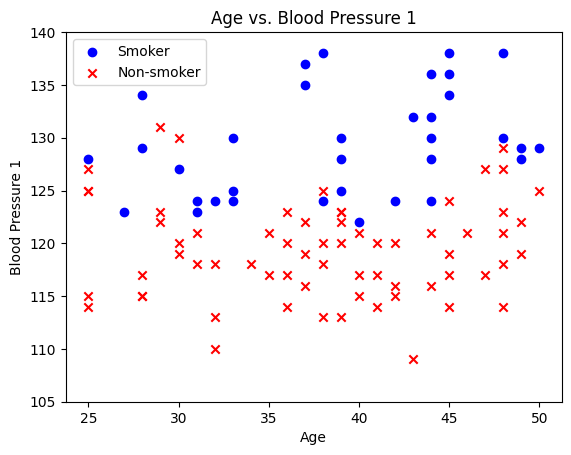

Median Age: 39.0
Median Blood Pressure: 122.0
[[4.53978687e-05 5.74442517e-01]
 [5.00000000e-01 9.99954602e-01]]
2 [0. 0. 0.] [  1.  38. 124.] (100, 3) (100, 2)
Difference (should be less than 1e-10): 1.484707581228588e-14
Optimization terminated successfully.
         Current function value: 0.318799
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30


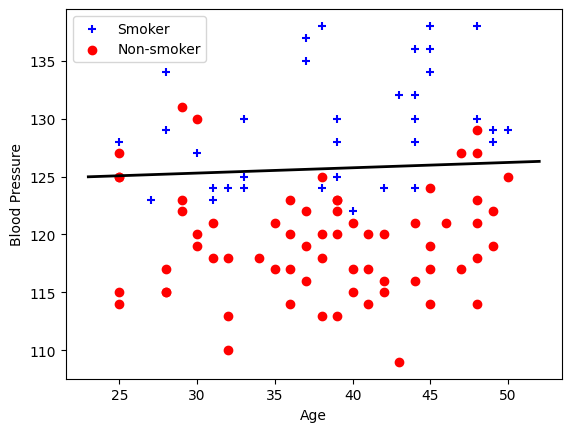

Probability for being smoker: 35.35325825798289


In [108]:
# Load the data
mat = scipy.io.loadmat(r'./../../datasets/hospital_python.mat', matlab_compatible=True)

# Converting the loaded .mat file into a Pandas DataFrame
data = pd.DataFrame({
    'Age': np.array(mat['Age']).flatten(),
    'BloodPressure': np.array(mat['BloodPressure']).flatten(),
    'Smoker': np.array(mat['Smoker']).flatten(),
})

# Accessing the data
Age = data['Age']
BloodPressure = data['BloodPressure']
Smoker = data['Smoker']

# Construct data and labels. Pre-process data.
x = np.c_[Age, BloodPressure]
y = Smoker

# Plot the data
plt.scatter(x[y==1, 0], x[y==1, 1], marker='o', color='b', label='Smoker')
plt.scatter(x[y==0, 0], x[y==0, 1], marker='x', color='r', label='Non-smoker')

# Adding labels and legend
plt.xlabel('Age')
plt.ylim([105, 140])
plt.ylabel('Blood Pressure 1')
plt.legend()
plt.title('Age vs. Blood Pressure 1')
plt.show()
median_age = np.median(x[:, 0])
median_blood_pressure = np.median(x[:, 1])
print(f"Median Age: {median_age}")
print(f"Median Blood Pressure: {median_blood_pressure}")

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def cost_logistic_regression(theta, X, y, Lambda=None):
    """
    Compute cost and gradient for logistic regression.
    """
    if Lambda is None:
        Lambda = 0
    m = len(y)  # number of training examples
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    h = sigmoid(X.dot(theta))
    J = -(1/m) * np.sum(y.T*np.log(h) + (1-y).T*np.log(1-h))
    grad = (1.0 / m) * X.T.dot(h-y)
    # ============================================================

    return J, grad

# Example usage:
g = sigmoid(np.array([[-10, 0.3], [0, 10]]))
print(g)

X = np.c_[np.ones(x.shape[0]), x]

# Initialize theta
n = x.shape[1]  # Number of features
theta = np.zeros(n + 1)
print(n,theta,X[0],X.shape,x.shape)

# Compare gradients
J, grad = cost_logistic_regression(theta, X, y);
J_func = lambda t: cost_logistic_regression(t, X, y)[0]
numgrad = check_gradient(J_func, theta)
diff = np.linalg.norm(numgrad.flatten() - grad.flatten()) / np.linalg.norm(numgrad + grad)
print("Difference (should be less than 1e-10):", diff)

from scipy.optimize import minimize

# Alternative way to optimize beside our own gradient descent
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
res = minimize(fun=lambda t: cost_logistic_regression(t, X, y)[0],  # cost
               x0=theta,
               method='BFGS',
               jac=lambda t: cost_logistic_regression(t, X, y)[1].flatten(),  # gradient
               options={'maxiter': 400, 'disp': True})

theta = res.x
cost = res.fun

# Plot data and decision boundary
plt.scatter(X[y==1, 1], X[y==1, 2], marker='+', color='b', label='Smoker')
plt.scatter(X[y==0, 1], X[y==0, 2], marker='o', color='r', label='Non-smoker')

plot_x = np.array([np.min(X[:,1])-2,  np.max(X[:,1])+2])
plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

# Calculate the probability of a person with age 32 and blood pressure 124 is a smoker.
# ====================== YOUR CODE HERE ======================
prob = sigmoid(theta[0] + theta[1] * 32 + theta[2] * 124)
print("Probability for being smoker: " + str(prob*100))
# ============================================================


# Exercises for Pass with distinction (VG) 

## Gradient descent with momentum

In [109]:
# ====================== YOUR CODE HERE ======================

## Check code in exercise 3, where there is a momentum flag, and when it is equal to 1, it runs GD with momentum.

# ============================================================

## Non-linear logistic regression with polynomial features

Probability for being smoker: 31.23


/var/folders/hj/yrzp_6d94g91tf5mbs7ysj_80000gn/T/ipykernel_1136/2541038787.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(np.dot(mapped_uv, theta))


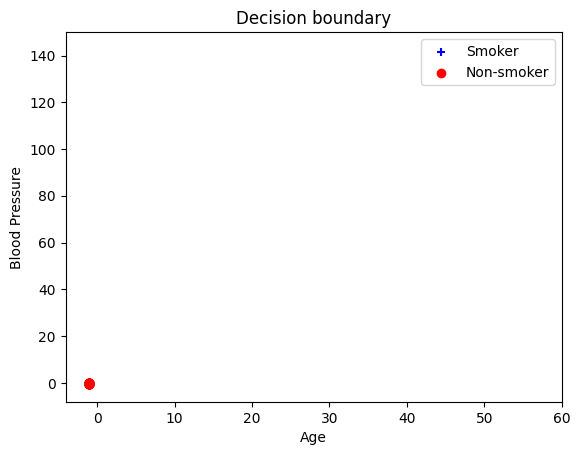

In [110]:
# Assume the following functions are defined as per your previous code:
# map_feature, feature_mean_normalize, sigmoid, cost_logistic_regression, plot_decision_boundary
def map_feature(X1, X2, degree):
    if X1.shape != X2.shape:
        raise ValueError("Input features must be the same size")
    out = np.ones(X1.shape[0]).reshape(-1, 1)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            new_feature = (X1 ** (i - j) * X2 ** j).reshape(-1, 1)
            out = np.hstack((out, new_feature))
    return out

# ====================== YOUR CODE HERE ======================
bp = BloodPressure.array
age = Age.array
degree = 2

x = np.c_[Age, BloodPressure]
y = Smoker
X = np.c_[np.ones(x.shape[0]), x]

X, mu, sigma = feature_mean_normalize(X)
X = map_feature(X[:, 0], X[:, 1], degree)
y = Smoker.array

theta = np.zeros(X.shape[1])

result = minimize(cost_logistic_regression, theta, args=(X, y), method='BFGS', jac=True)
optimal_theta = result.x

new_data = np.array([[124], [32]])

new_data, muNew, sigmaNew = feature_mean_normalize(new_data)

new_data_poly = map_feature(new_data[0], new_data[1], degree)

hypothesis = sigmoid(new_data_poly.flatten() @ optimal_theta.flatten())

percentage = round(hypothesis * 100, 2)

print("Probability for being smoker: " + str(percentage))


# ============================================================

# Plot the decision boundary
plt.scatter(X[y==1, 1], X[y==1, 2], marker='+', color='b', label='Smoker')
plt.scatter(X[y==0, 1], X[y==0, 2], marker='o', color='r', label='Non-smoker')
u = np.linspace(15, 60, 50)
v = np.linspace(95, 150, 50)
z = np.zeros((len(u), len(v)))
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        mapped_uv = map_feature(np.array([ui]), np.array([vj]), degree)
        mapped_uv[:, 1:] = (mapped_uv[:, 1:] - mu) / sigma  # Normalizing
        z[i, j] = sigmoid(np.dot(mapped_uv, theta))

z = z.T
plt.contour(u, v, z, [0.5], colors='k', linewidths=2)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.title('Decision boundary')
plt.show()


## 10-fold cross validation

In [111]:
# Perform a 10-fold cross validation on the hospital data using a linear logistic regression model. 

# ====================== YOUR CODE HERE ======================

from sklearn.model_selection import KFold

def n_fold_cross_validation(X, y, model, n_folds):

    accuracy_scores = []

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracy_scores.append(accuracy)

    mean_accuracy = np.mean(accuracy_scores)

    return accuracy_scores, mean_accuracy

from sklearn.linear_model import LogisticRegression

# Instead of using our own, we try to use the sklearn logistic regression function.
model = LogisticRegression()

x = np.c_[Age, BloodPressure]
y = Smoker
X = np.c_[np.ones(x.shape[0]), x]

# Instead of using our own scaler, we use the one from sklearn
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

n_folds = 10
accuracy_scores, mean_accuracy = n_fold_cross_validation(X, y, model, n_folds)

# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)

# ============================================================

Accuracy scores for each fold: [0.7, 0.8, 0.8, 0.7, 0.9, 0.8, 1.0, 0.8, 1.0, 0.7]
Mean accuracy: 0.82
